### Experiment 10

Straight coast from SVB to the northern boundary (bay and no bay)

In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

from datetime import datetime
import time

In [1]:
outdir = '/data/SO2/sio-kramosmusalem/exp11_512x612x100_smooth_SVB/01_febTS_1000x/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp11_512x612x100_smooth/01_febTS_1000x/'

outdirb = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/01_SVB_febTS_output/'
outdir2b = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/01_noSVB_febTS/'


iters = np.arange(20,14400,20)
iters2 = np.arange(20,12240,20)
iters3 = np.arange(12240,16560,40)
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels, delta_t=60, iters=iters2)
dsb = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels, delta_t=30, iters=iters3)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels, delta_t=60, iters=iters)

dsB = open_mdsdataset(outdirb, prefix=['eta'], levels=levels, delta_t=60)
ds2B = open_mdsdataset(outdir2b, prefix=['eta'], levels=levels, delta_t=60)


NameError: name 'np' is not defined

In [5]:
nx = 576
ny = 612
nz = 100
depthSVB = ds.Depth[:]
depth = ds2.Depth[:]

depthSVB2 = dsB.Depth[:]
depth2 = ds2B.Depth[:]

LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)

# Bay centers mask
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

# No bay centers mask rough
hFacCB = ds2B['hFacC'][:]
hfacB = np.ma.masked_values(hFacCB, 0)
maskB = np.ma.getmask(hfacB)
dep_maskedB = np.ma.masked_values(depth2,0)
mask_depB = np.ma.getmask(dep_maskedB)

# Bay centers mask rough
hFacCSVB2 = dsB['hFacC'][:]
hfacSVB2 = np.ma.masked_values(hFacCSVB2, 0)
maskSVB2 = np.ma.getmask(hfacSVB2)
dep_maskedSVB2 = np.ma.masked_values(depthSVB2,0)
mask_depSVB2 = np.ma.getmask(dep_maskedSVB2)

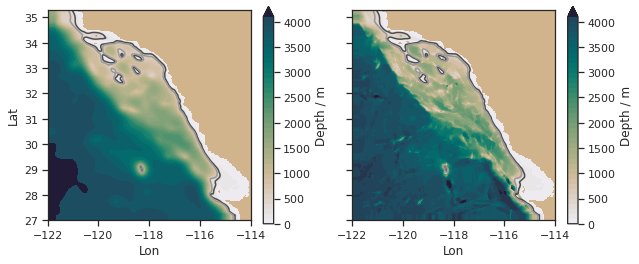

In [7]:
sns.set_style('ticks')
sns.set_context('notebook')
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,4), sharey=True, sharex=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')

pc = ax.contourf(LON,LAT,dep_maskedSVB,50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, ax=ax, extend='max',label='Depth / m')
cn = ax.contour(LON,LAT,depthSVB, colors=['0.3','0.6'], 
                levels=[250,500])

#ax.contour(lon,lat,depth[:,:], levels=[0], colors='k')

pc2 = ax2.contourf(LON,LAT,dep_maskedSVB2,50,
                vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb2 = plt.colorbar(pc,ax=ax2, extend='max',label='Depth / m')
cn2 = ax2.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                 levels=[250,500])

ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax2.set_xlim(238-360, 246-360)
ax2.set_ylim(27,35.3)
ax2.set_aspect(1)
ax.set_aspect(1)


(611, 76, 612, 512)
(719, 76, 612, 512)


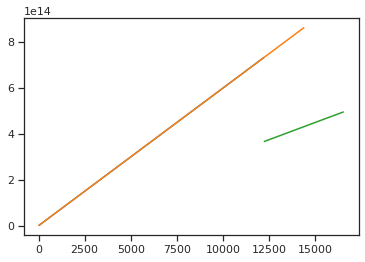

In [45]:
print(np.shape(ds['UVEL']))
print(np.shape(ds2['UVEL']))

plt.plot(ds.iter,ds.time)
plt.plot(ds2.iter, ds2.time)
plt.plot(dsb.iter, dsb.time)

In [47]:
ds.time

<xarray.DataArray 'time' (time: 611)>
array([  1200000000000,   2400000000000,   3600000000000, ..., 730800000000000,
       732000000000000, 733200000000000], dtype='timedelta64[ns]')
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:20:00 00:40:00 ... 8 days 11:40:00

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'DataArray' object

613


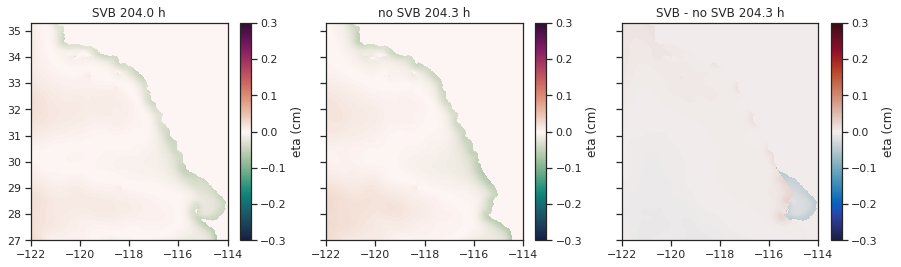

614


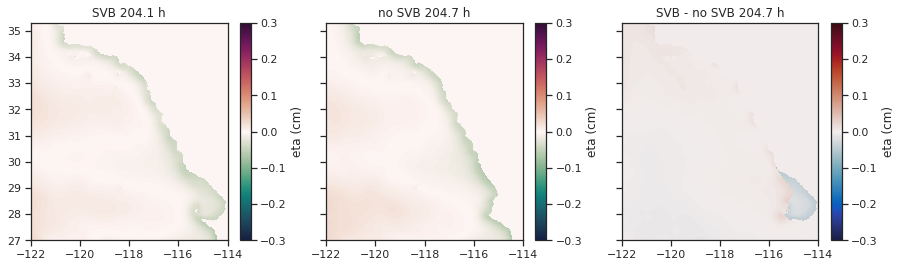

In [6]:
sns.set_style('ticks')
sns.set_context('notebook')

time = ds.iter[:]*60
for ii in range(613,615,1):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')
    print(ii)
    pc = ax.pcolormesh(lon,lat,ds['ETAN'][ii,:,:]*100,
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax,label='eta (cm)')
    ax.set_title('SVB %1.1f h' %(time[ii]/3600))

    pc = ax1.pcolormesh(lon,lat,ds2['ETAN'][ii,:,:]*100,
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.curl)
    cb = plt.colorbar(pc,ax=ax1,label='eta (cm)')
    ax1.set_title('no SVB %1.1f h' %((ii)*1200/3600))

    pc = ax2.pcolormesh(lon,lat,(ds['ETAN'][ii,:,:]-ds2['ETAN'][ii,:,:])*100,
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='eta (cm)')
    ax2.set_title('SVB - no SVB %1.1f h' %((ii)*1200/3600))
    
    ax.set_xlim(238-360, 246-360)
    ax.set_ylim(27,35.3)
    ax1.set_xlim(238-360, 246-360)
    ax1.set_ylim(27,35.3)
    ax2.set_xlim(238-360, 246-360)
    ax2.set_ylim(27,35.3)
    
    plt.show()

In [7]:
time

<xarray.DataArray 'iter' (time: 842)>
dask.array<mul, shape=(842,), dtype=int64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:20 00:00:40 ... 03:59:40 04:00:00

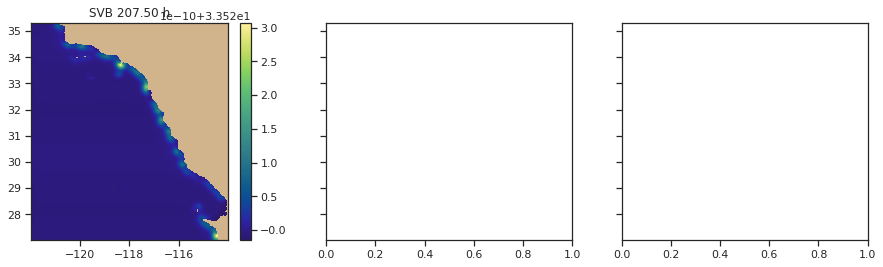

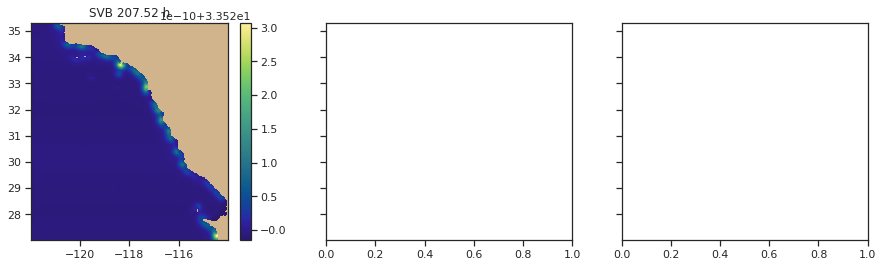

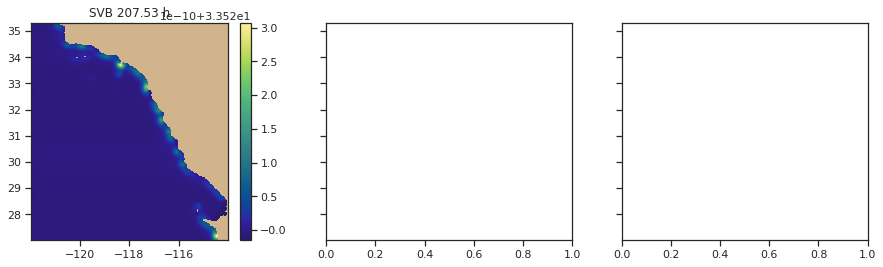

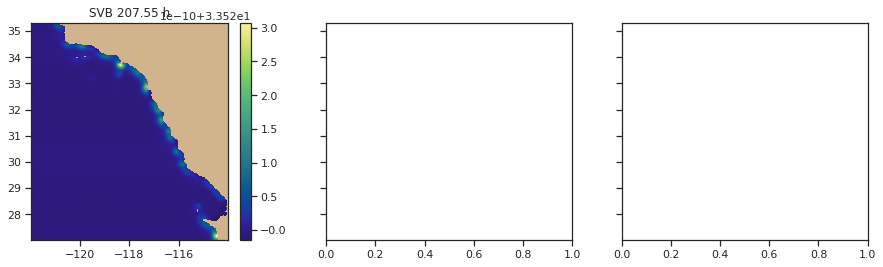

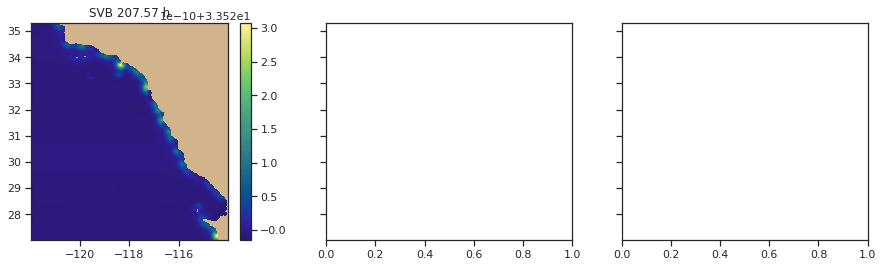

In [8]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(715,720,1):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,lat,np.ma.masked_array(ds['SALT'][ii,0,...], mask=maskSVB[0,:,:]),
                      #vmin=-3E-5,vmax=3E-5,
                       cmap=cmo.cm.haline)
    cb = plt.colorbar(pc,ax=ax,label='')
    ax.set_title('SVB %1.2f h' %(time[ii]/3600))

    #pc = ax1.pcolormesh(lon,lat,ds2['WVEL'][ii,0,...]*1E7,
    #              vmin=-1,vmax=1,cmap=cmo.cm.balance)
    #cb = plt.colorbar(pc,ax=ax1,label='w ($10^{-7}$ ms$^{-1}$)')
    #ax1.set_title('no SVB %1.1f h' %(ii*1200/3600))

    #pc = ax2.pcolormesh(lon,lat,(ds['WVEL'][ii,0,...]-ds2['WVEL'][ii,0,...])*1E7,
    #              vmin=-1,vmax=1,cmap=cmo.cm.balance)
    #cb = plt.colorbar(pc,ax=ax2,label='w ($10^{-7}$ ms$^{-1}$)')
    #ax2.set_title('SVB-noSVB %1.1f h' %(ii*1200/3600))

    plt.show()

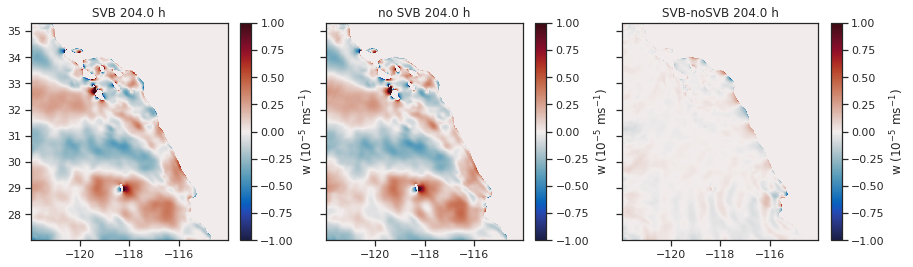

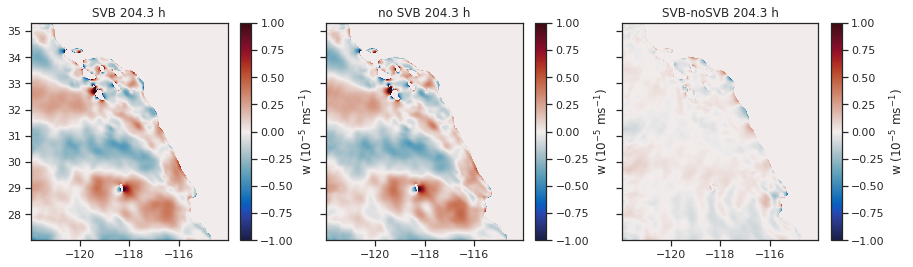

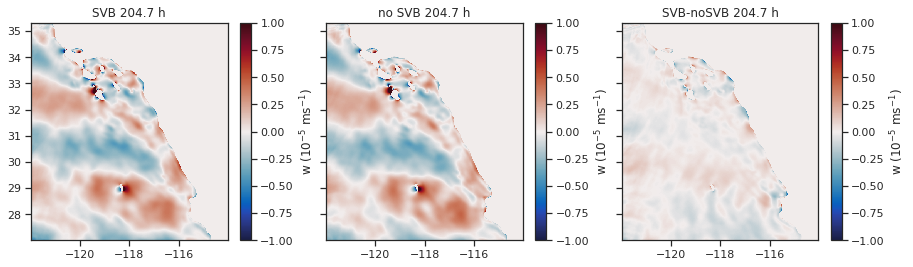

In [9]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(612,615,1):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,lat,ds['WVEL'][ii,50,...]*1E5,
                  vmin=-1,vmax=1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='w ($10^{-5}$ ms$^{-1}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,lat,ds2['WVEL'][ii,50,...]*1E5,
                  vmin=-1,vmax=1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='w ($10^{-5}$ ms$^{-1}$)')
    ax1.set_title('no SVB %1.1f h' %(ii*1200/3600))

    pc = ax2.pcolormesh(lon,lat,(ds['WVEL'][ii,50,...]-ds2['WVEL'][ii,50,...])*1E5,
                  vmin=-1,vmax=1,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='w ($10^{-5}$ ms$^{-1}$)')
    ax2.set_title('SVB-noSVB %1.1f h' %(ii*1200/3600))

    plt.show()

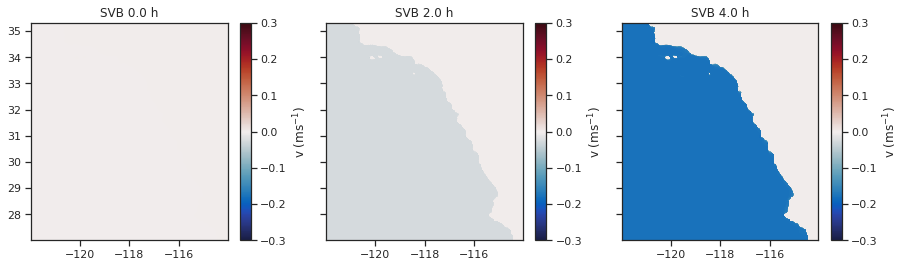

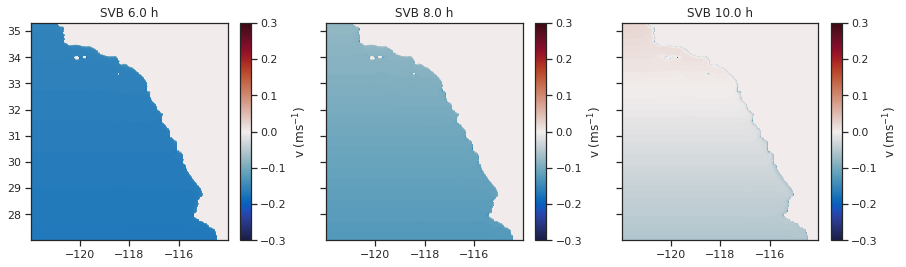

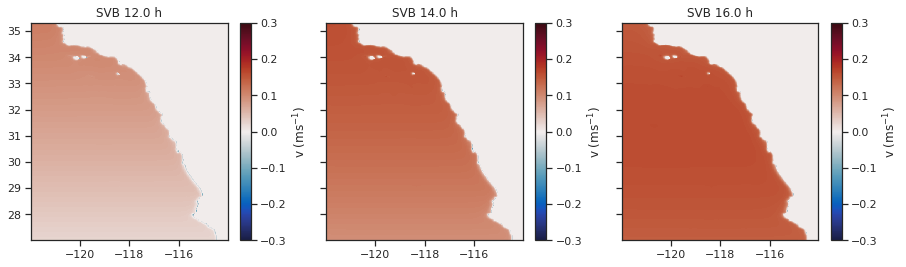

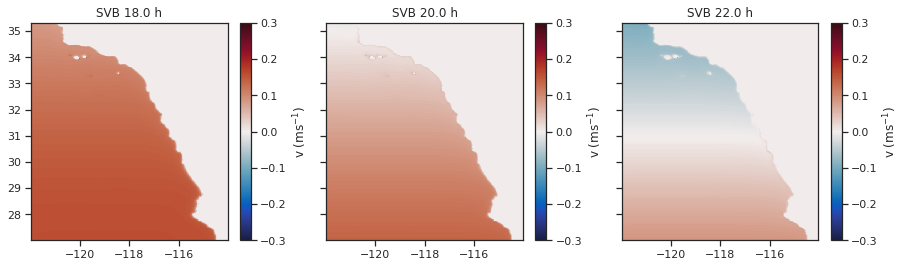

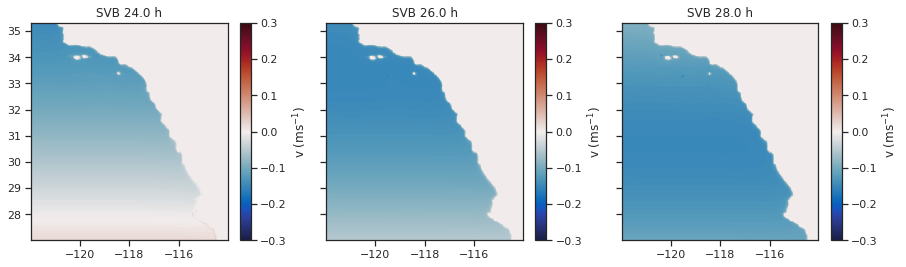

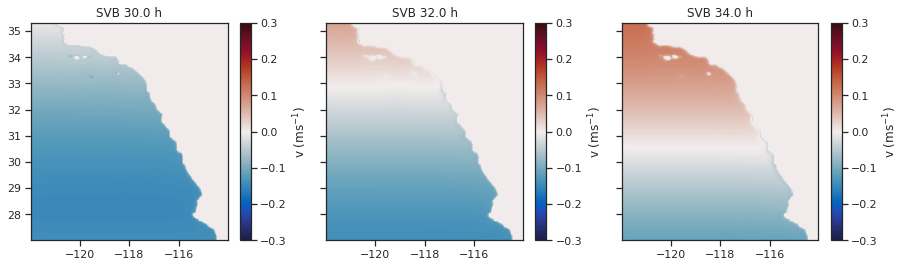

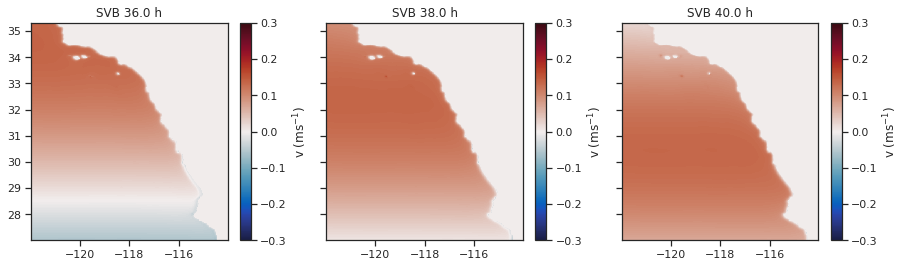

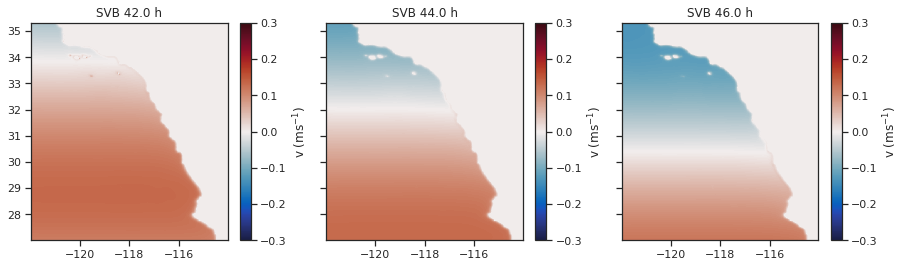

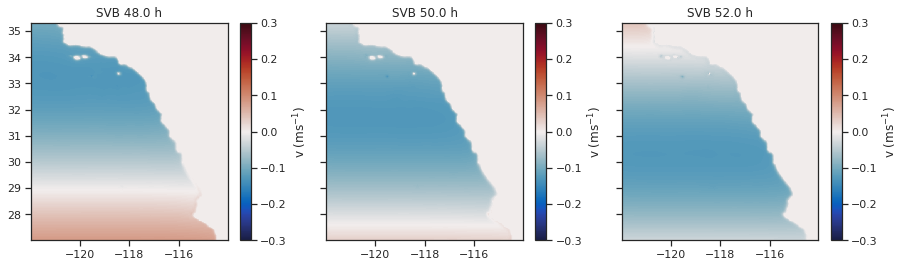

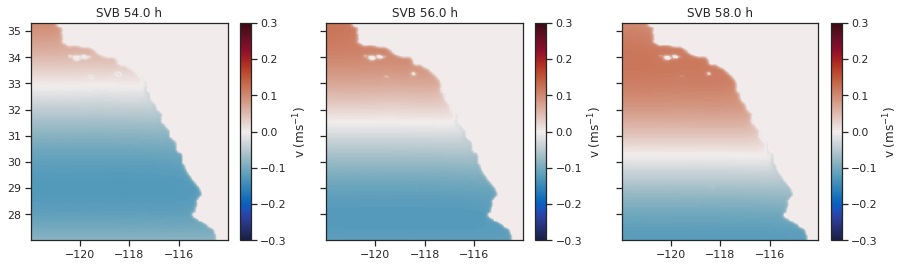

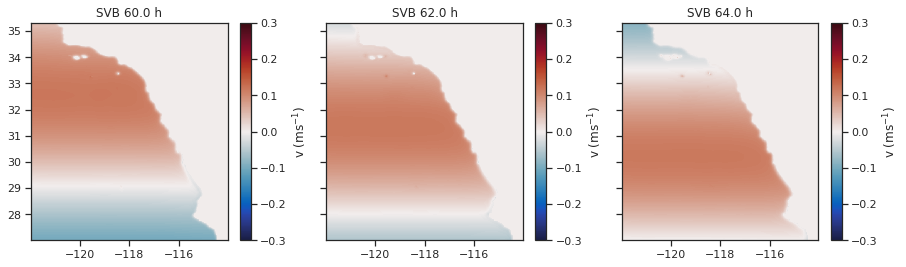

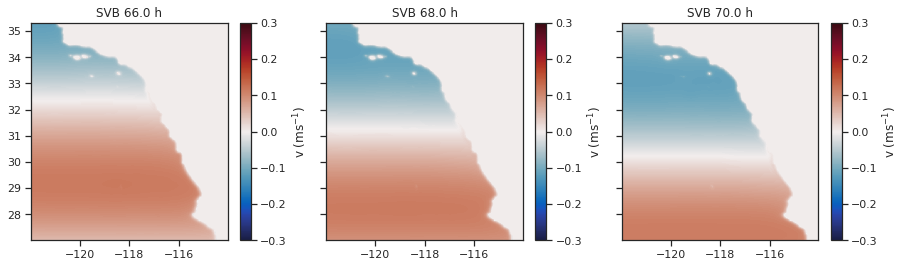

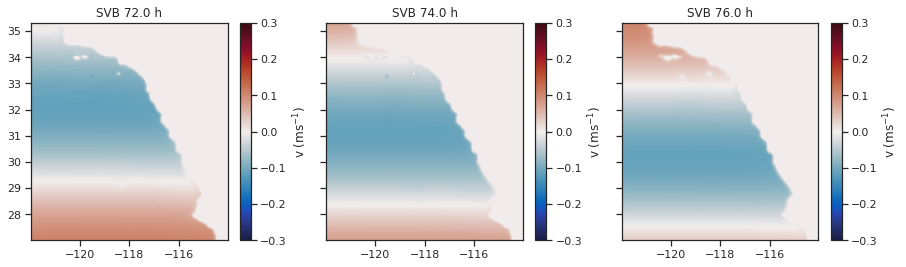

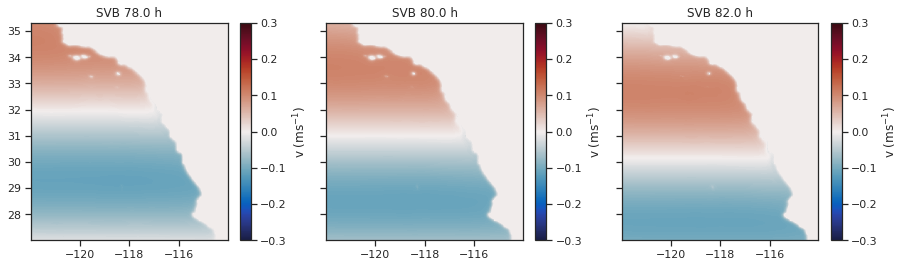

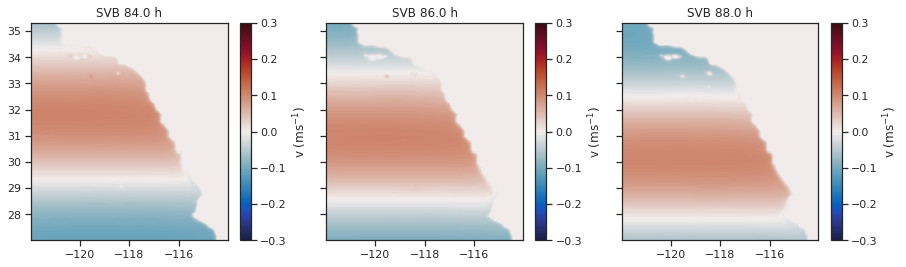

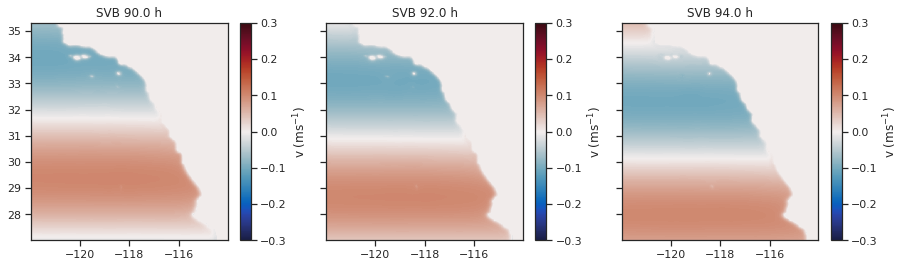

In [10]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(0,288,18):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,lat,ds2['VVEL'][ii,0,...],
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='v (ms$^{-1}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,lat,ds2['VVEL'][ii+6,0,...],
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='v (ms$^{-1}$)')
    ax1.set_title('SVB %1.1f h' %((ii+6)*1200/3600))

    pc = ax2.pcolormesh(lon,lat,(ds2['VVEL'][ii+12,0,...]),
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='v (ms$^{-1}$)')
    ax2.set_title('SVB %1.1f h' %((ii+12)*1200/3600))

    plt.show()

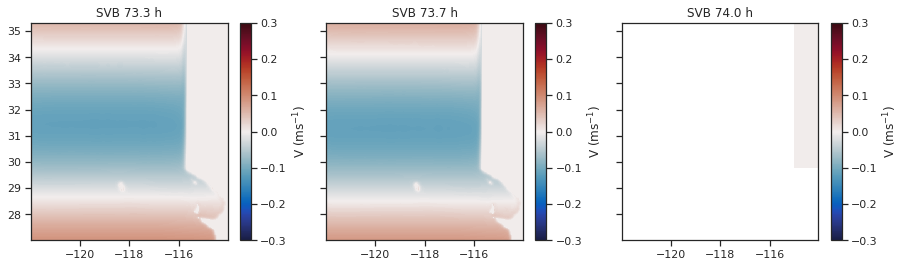

In [10]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in [220]:
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,lat,ds2['VVEL'][ii,0,...],
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='V (ms$^{-1}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,lat,ds2['VVEL'][ii+1,0,...],
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='V (ms$^{-1}$)')
    ax1.set_title('SVB %1.1f h' %((ii+1)*1200/3600))

    pc = ax2.pcolormesh(lon,lat,(ds2['VVEL'][ii+2,0,...]),
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='V (ms$^{-1}$)')
    ax2.set_title('SVB %1.1f h' %((ii+2)*1200/3600))

    plt.show()

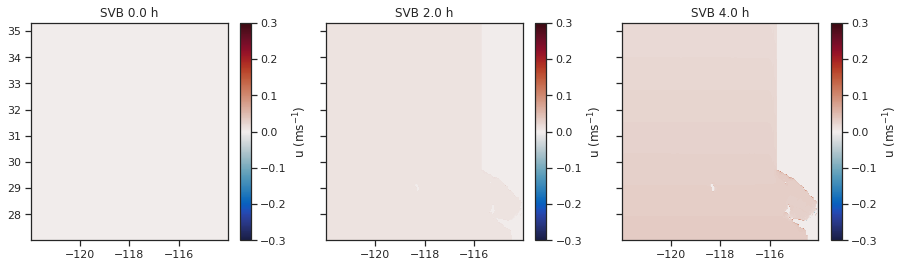

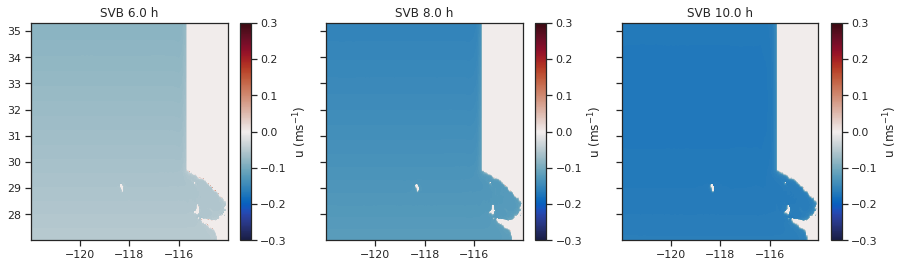

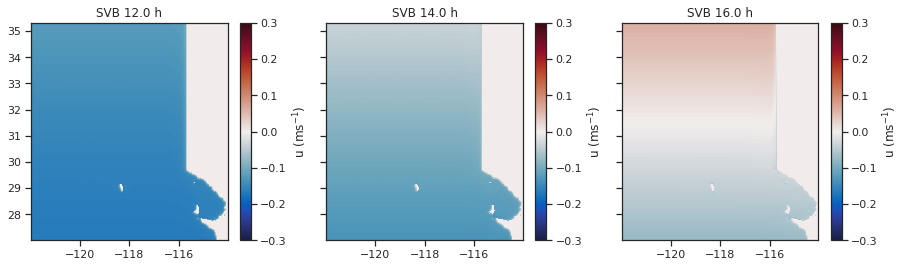

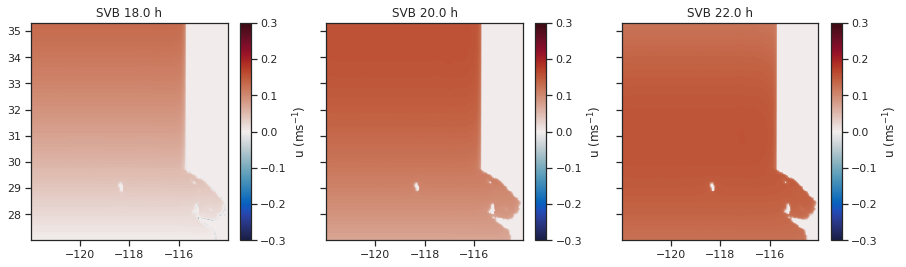

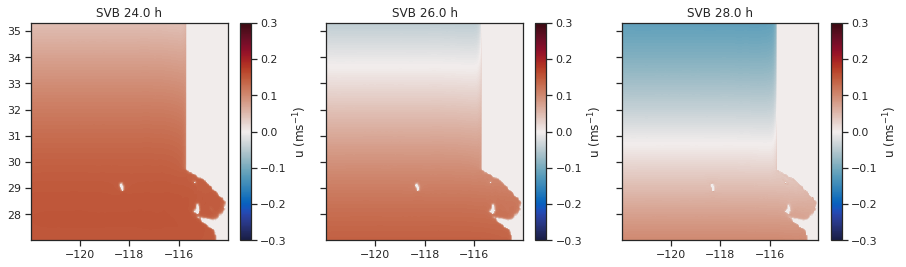

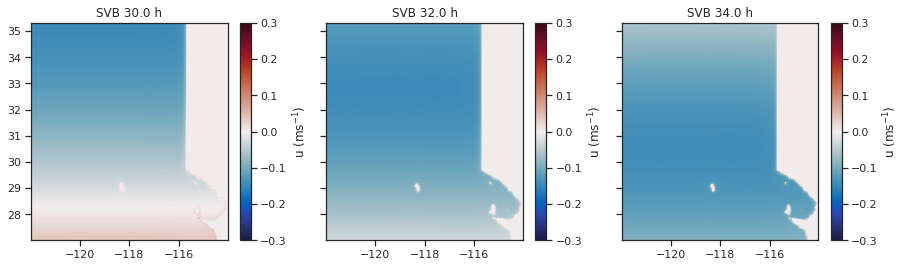

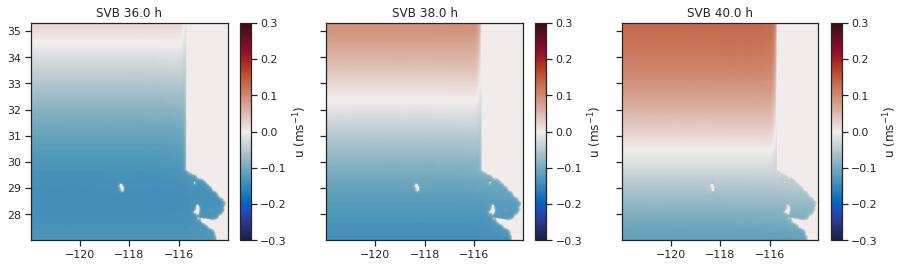

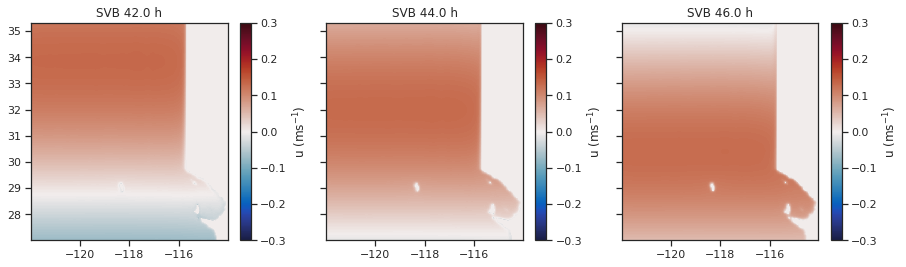

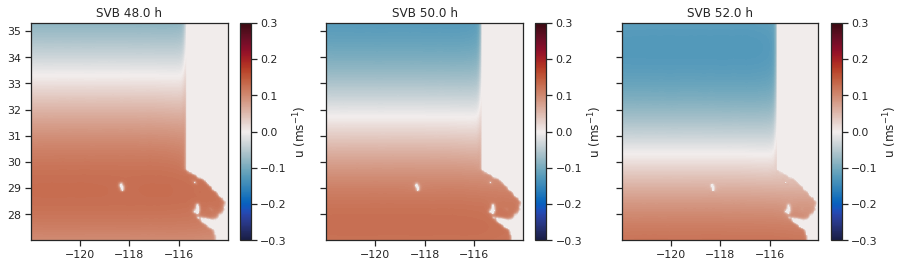

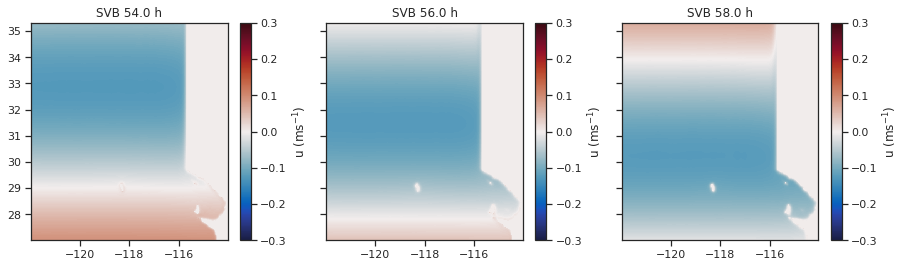

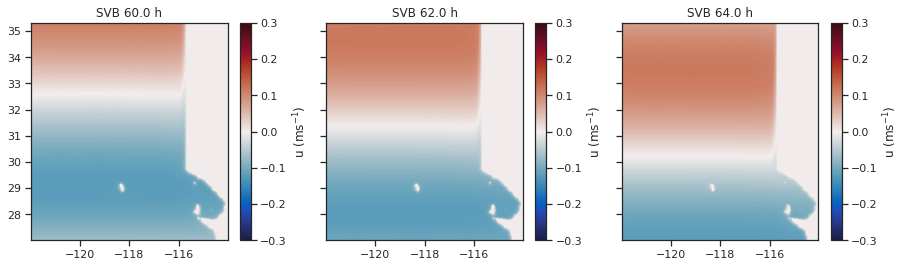

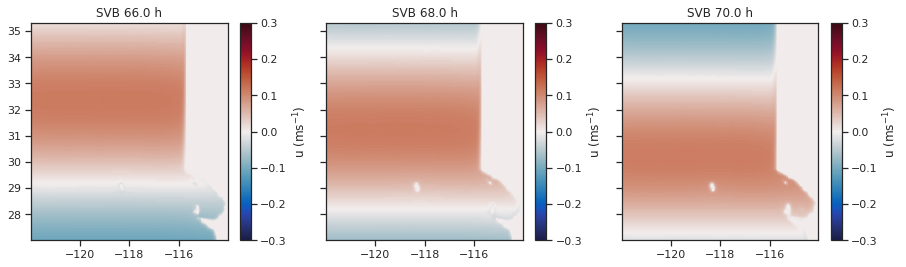

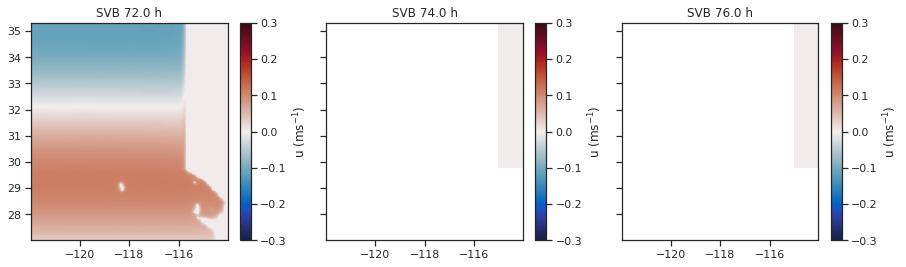

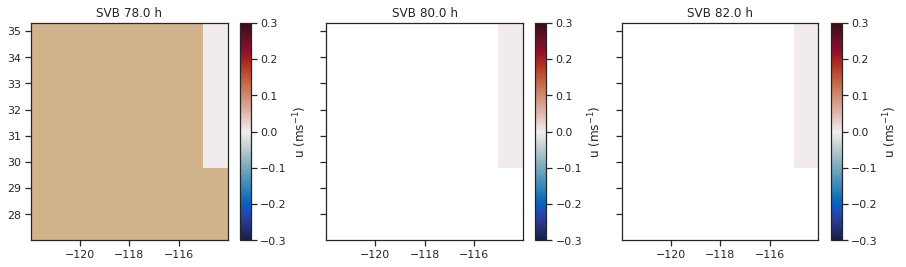

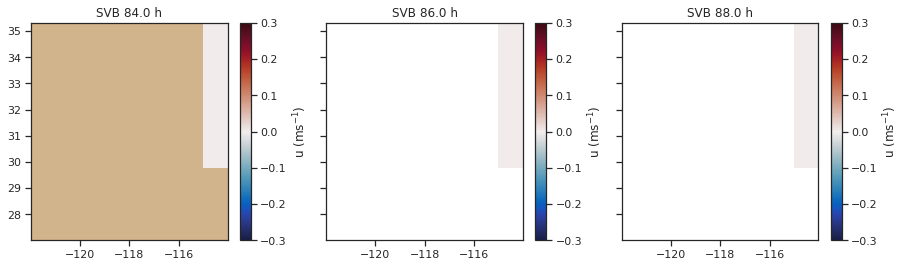

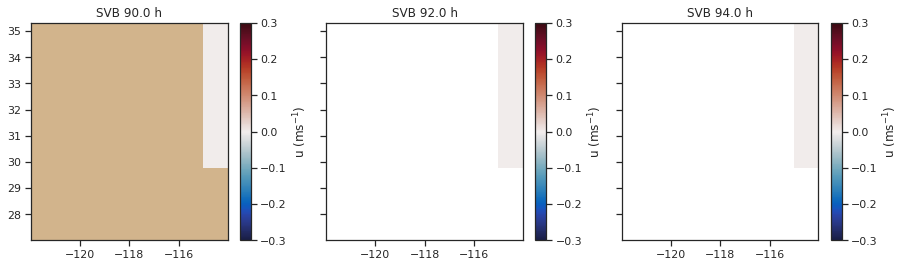

In [11]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(0,288,18):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,lat,ds2['UVEL'][ii,0,...],
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='u (ms$^{-1}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,lat,ds2['UVEL'][ii+6,0,...],
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='u (ms$^{-1}$)')
    ax1.set_title('SVB %1.1f h' %((ii+6)*1200/3600))

    pc = ax2.pcolormesh(lon,lat,(ds2['UVEL'][ii+12,0,...]),
                  vmin=-0.30,vmax=0.30,cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='u (ms$^{-1}$)')
    ax2.set_title('SVB %1.1f h' %((ii+12)*1200/3600))

    plt.show()

### Boundaries

N, S boundary doesn't look weird.

Trying zonal cross-section.

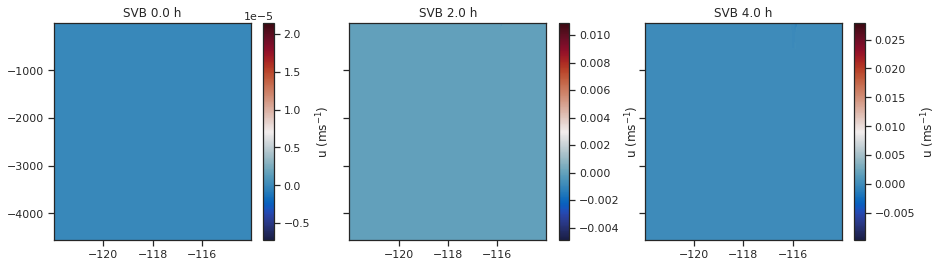

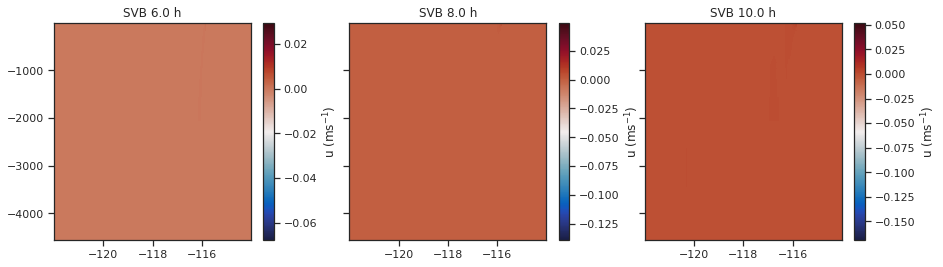

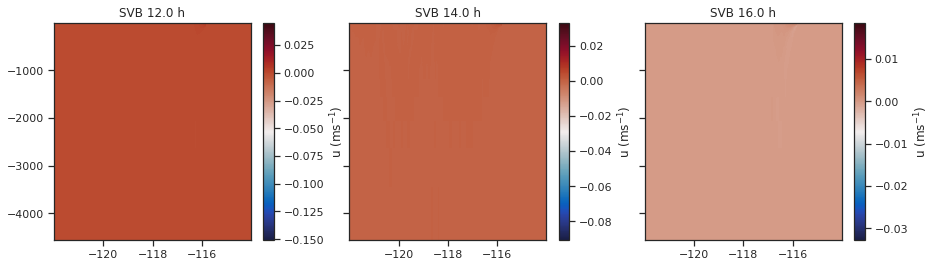

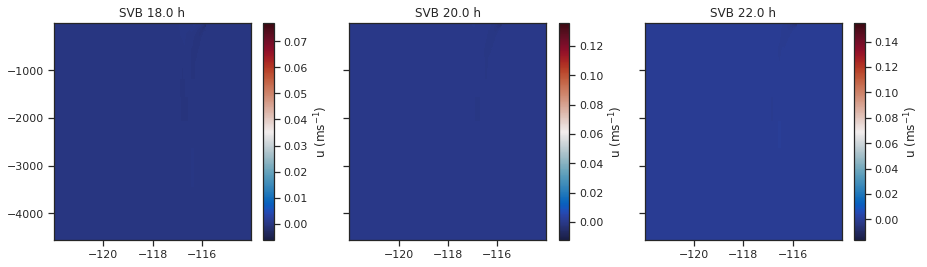

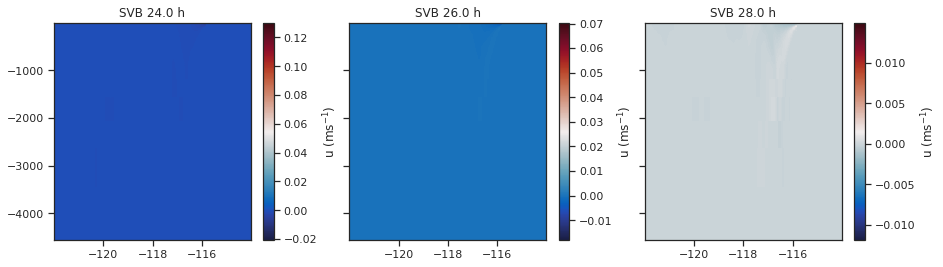

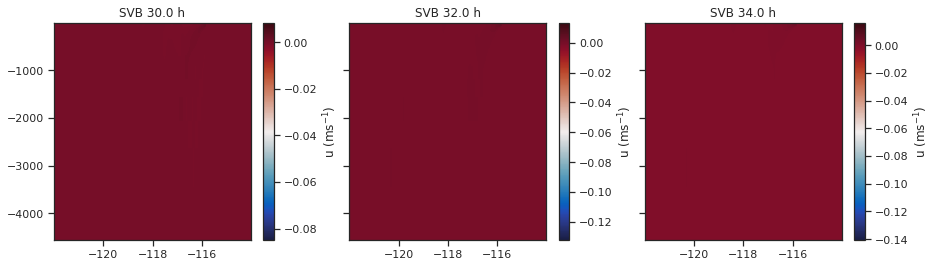

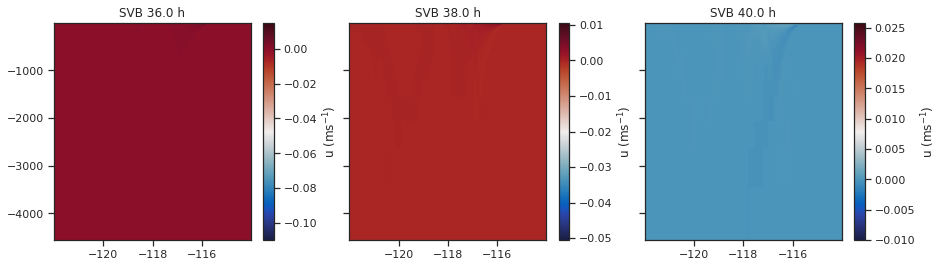

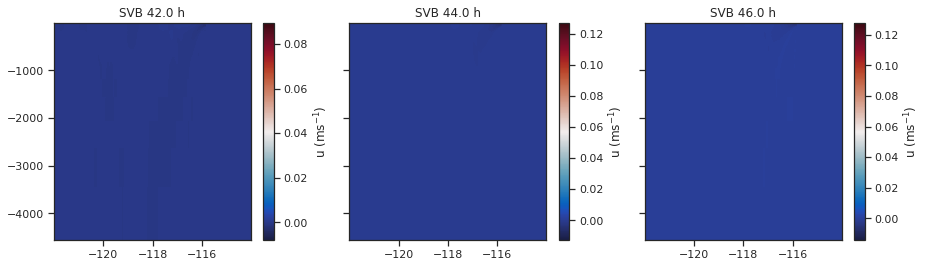

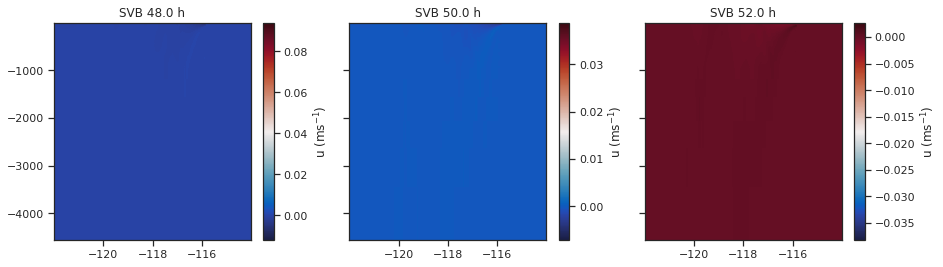

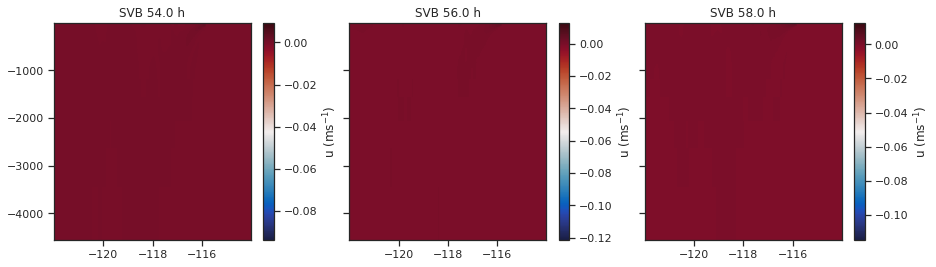

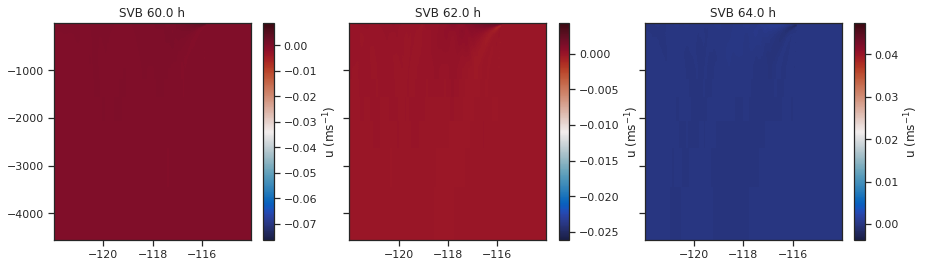

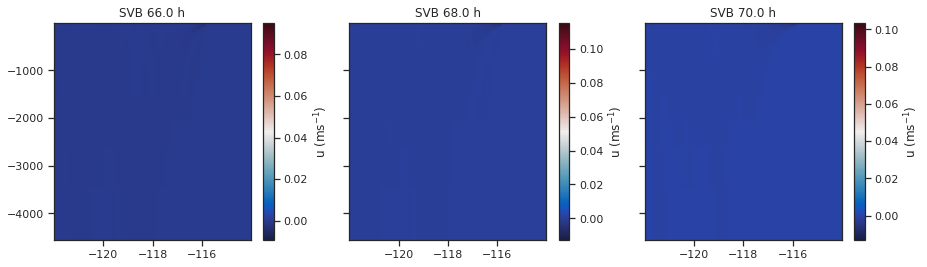

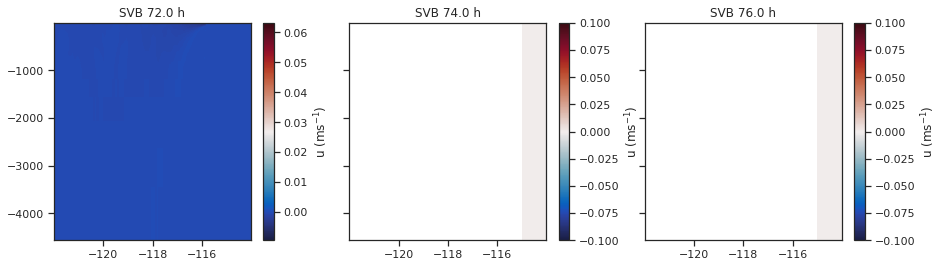

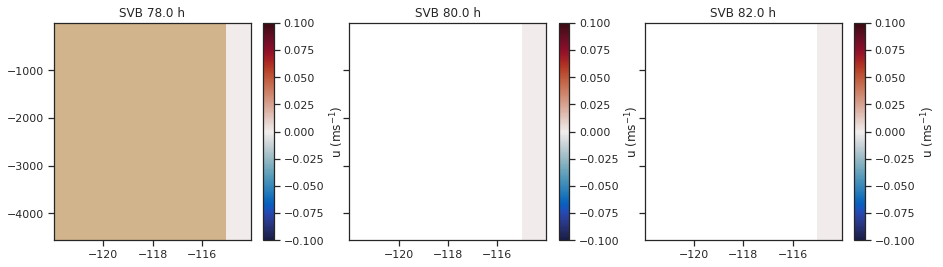

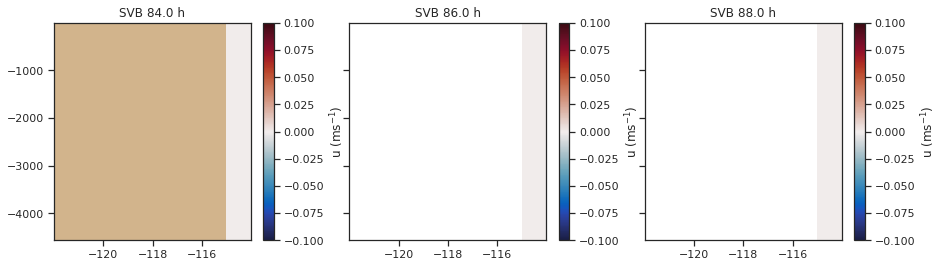

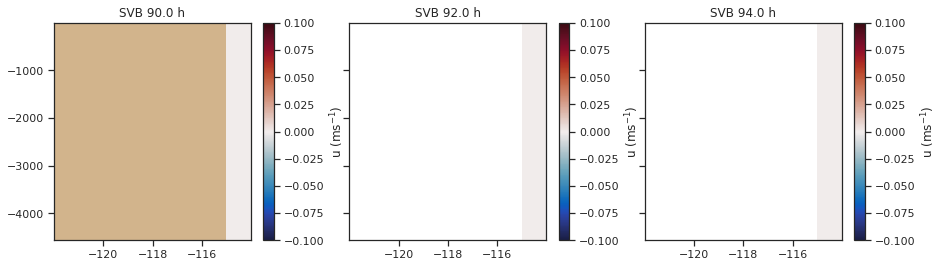

In [19]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(0,288,18):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,Z,ds2['UVEL'][ii,:,300,:],
                       #vmin=-0.030,vmax=0.030,
                       cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='u (ms$^{-1}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,Z,ds2['UVEL'][ii+6,:,300,:],
                        #vmin=-0.030,vmax=0.030,
                        cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='u (ms$^{-1}$)')
    ax1.set_title('SVB %1.1f h' %((ii+6)*1200/3600))

    pc = ax2.pcolormesh(lon,Z,(ds2['UVEL'][ii+12,:,300,:]),
                        #vmin=-0.030,vmax=0.030,
                        cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='u (ms$^{-1}$)')
    ax2.set_title('SVB %1.1f h' %((ii+12)*1200/3600))

    plt.show()

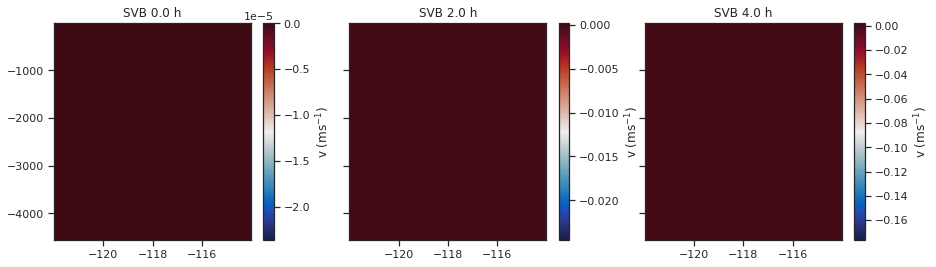

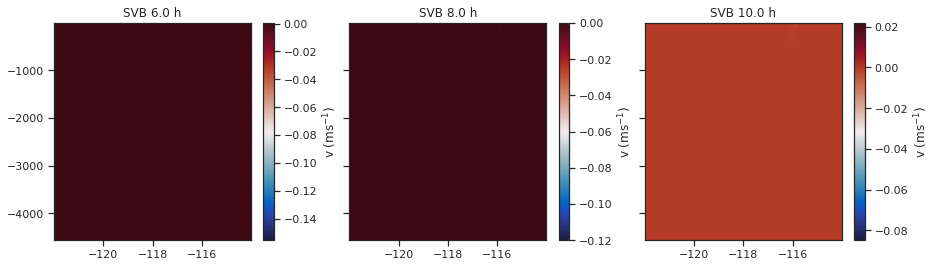

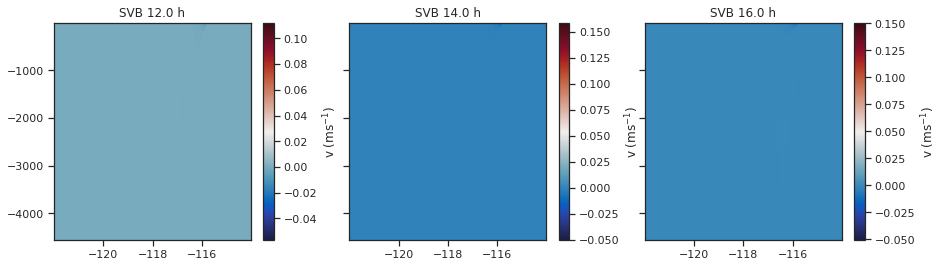

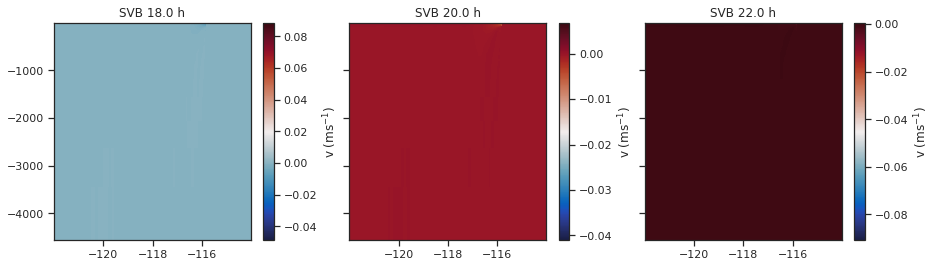

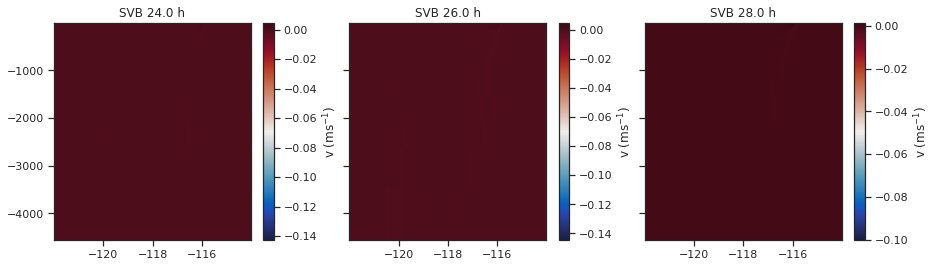

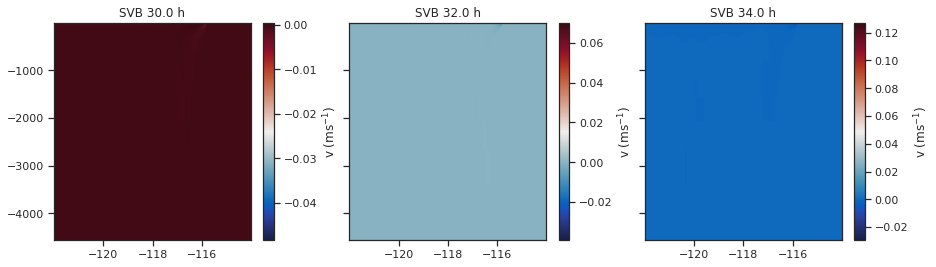

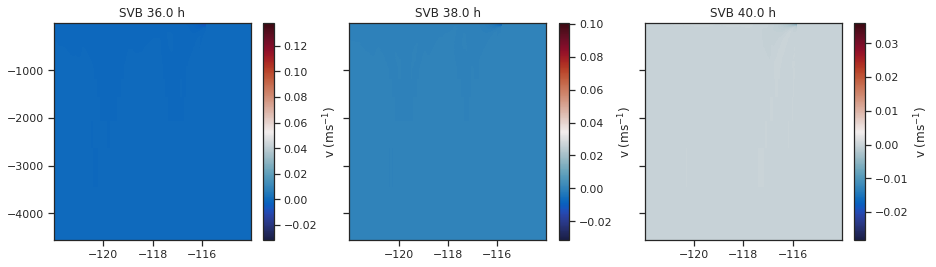

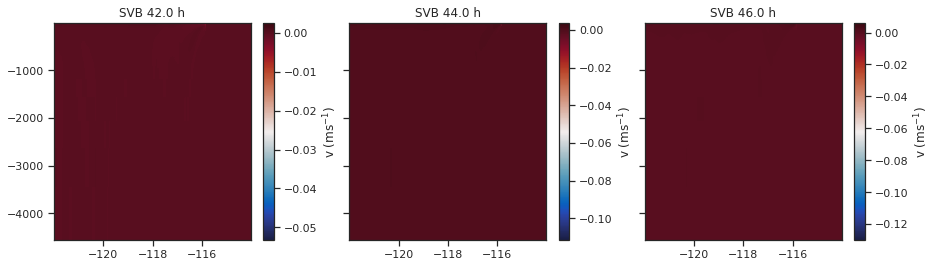

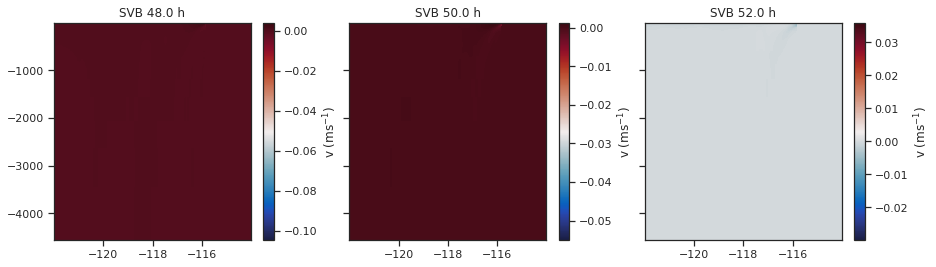

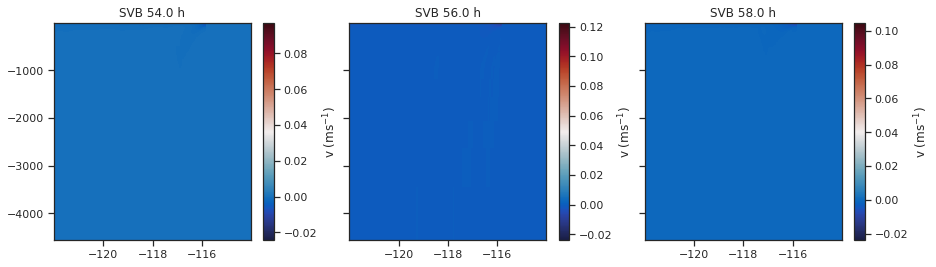

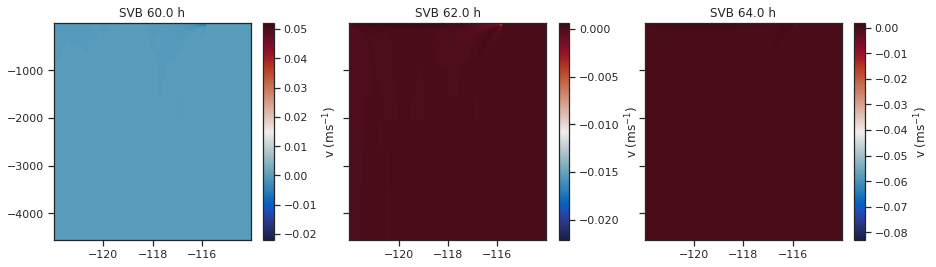

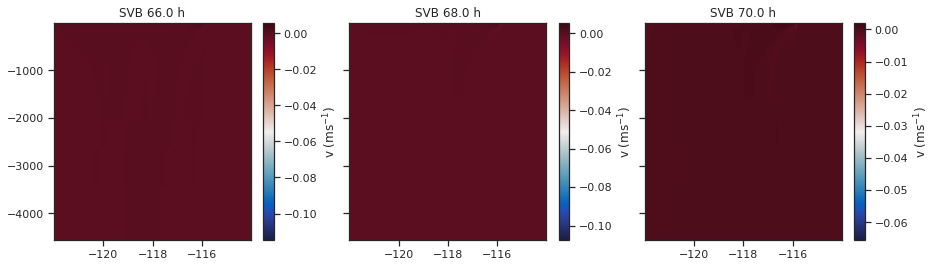

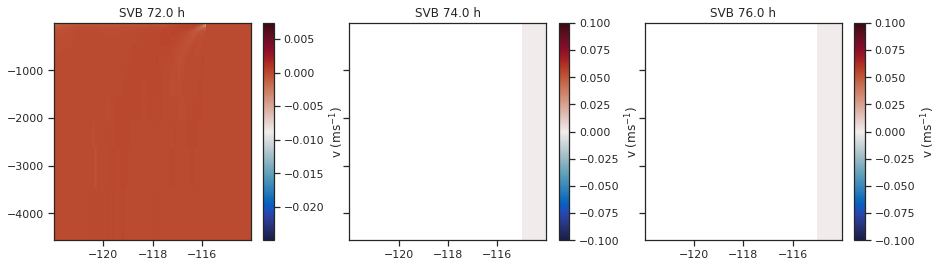

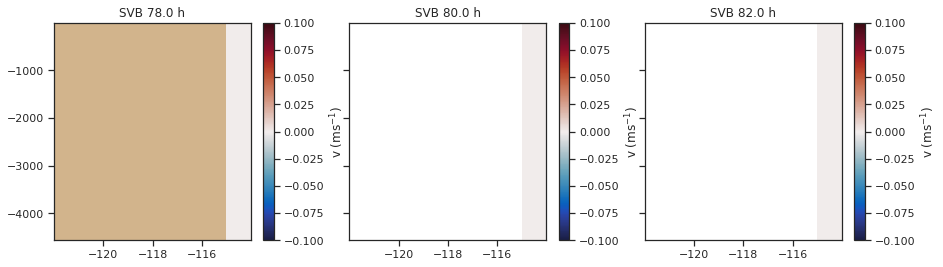

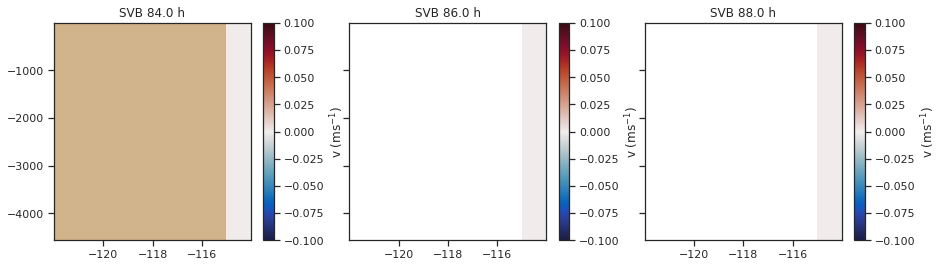

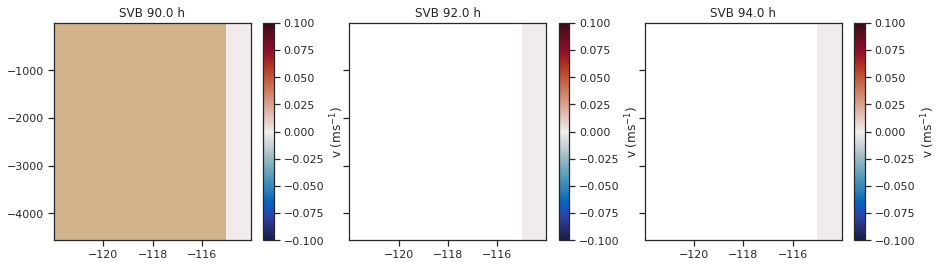

In [13]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(0,288,18):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,Z,ds2['VVEL'][ii,:,300,:],
                       #vmin=-0.030,vmax=0.030,
                       cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='v (ms$^{-1}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,Z,ds2['VVEL'][ii+6,:,300,:],
                        #vmin=-0.030,vmax=0.030,
                        cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='v (ms$^{-1}$)')
    ax1.set_title('SVB %1.1f h' %((ii+6)*1200/3600))

    pc = ax2.pcolormesh(lon,Z,(ds2['VVEL'][ii+12,:,300,:]),
                        #vmin=-0.030,vmax=0.030,
                        cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='v (ms$^{-1}$)')
    ax2.set_title('SVB %1.1f h' %((ii+12)*1200/3600))

    plt.show()

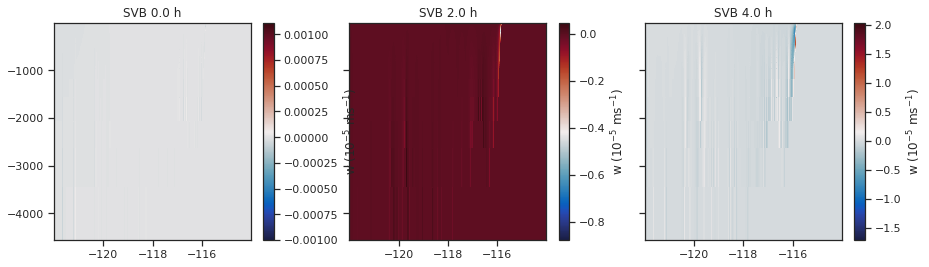

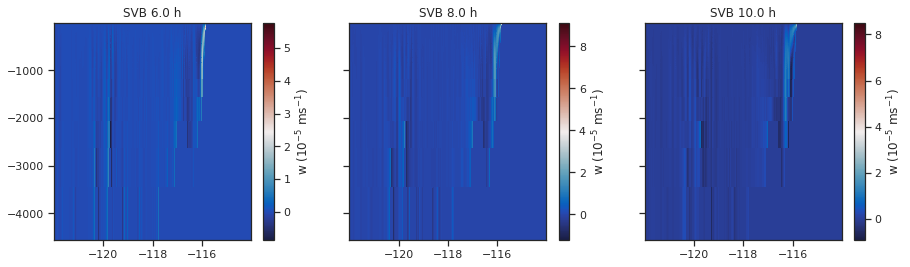

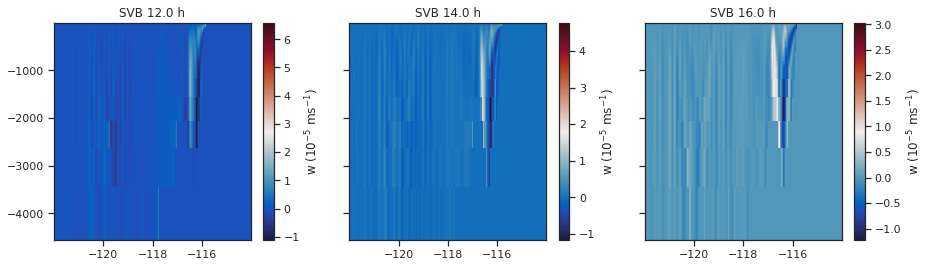

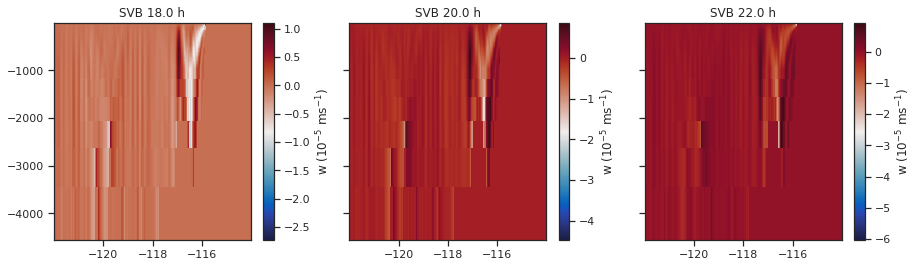

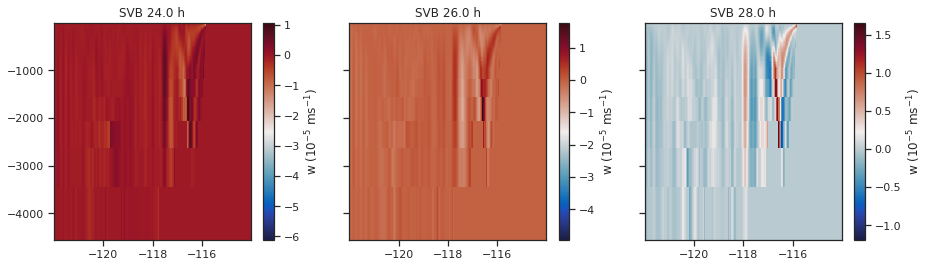

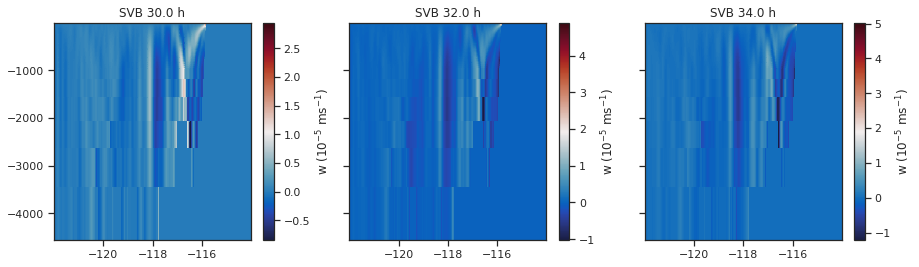

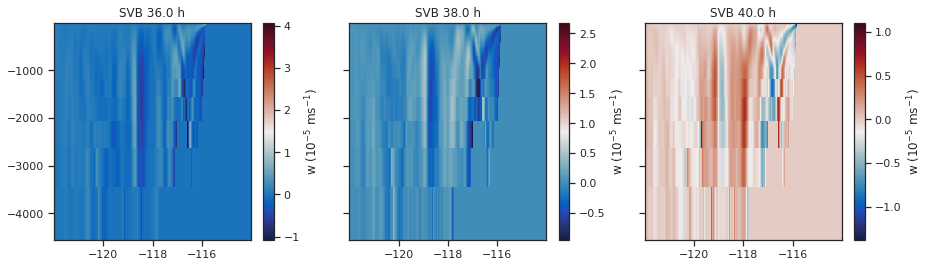

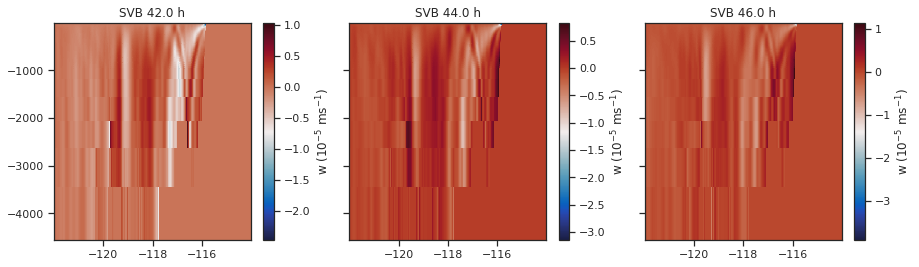

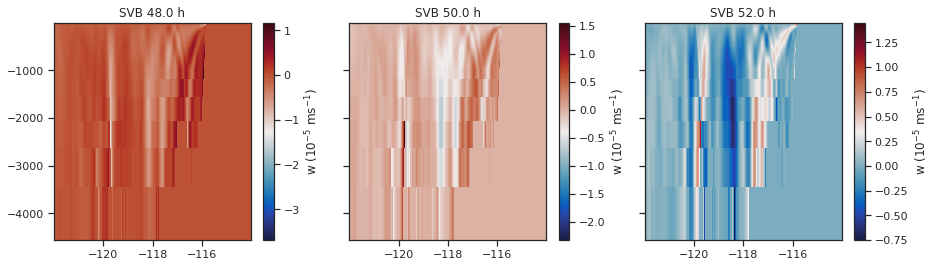

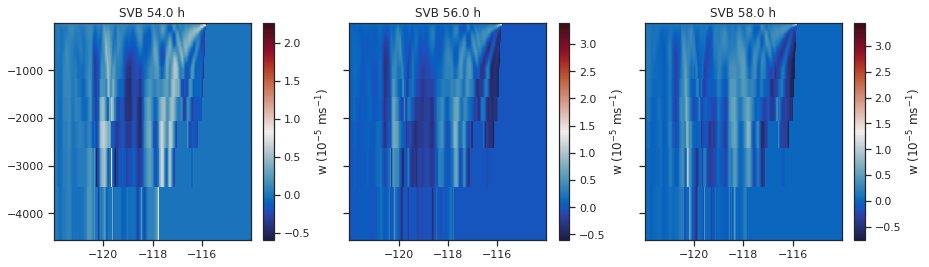

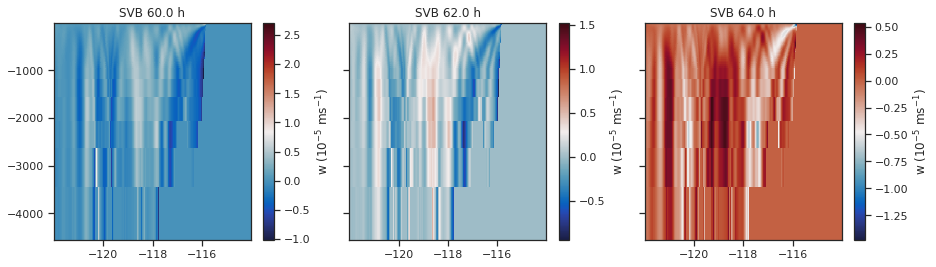

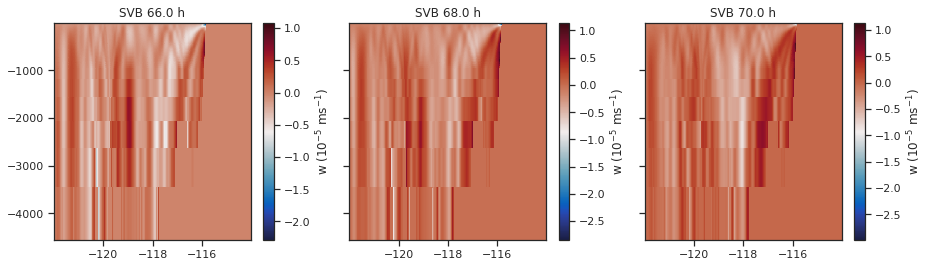

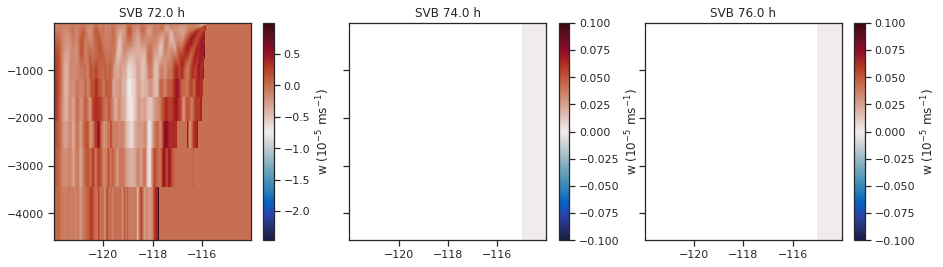

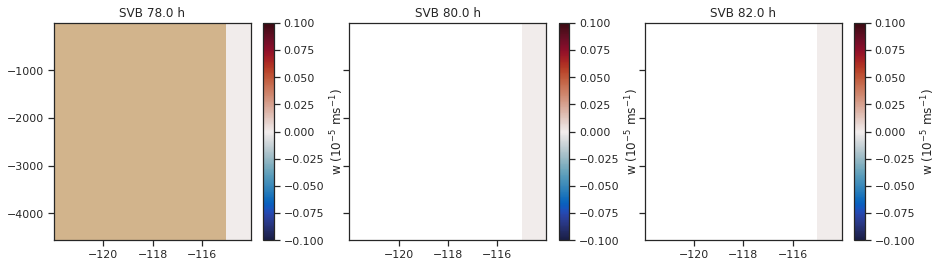

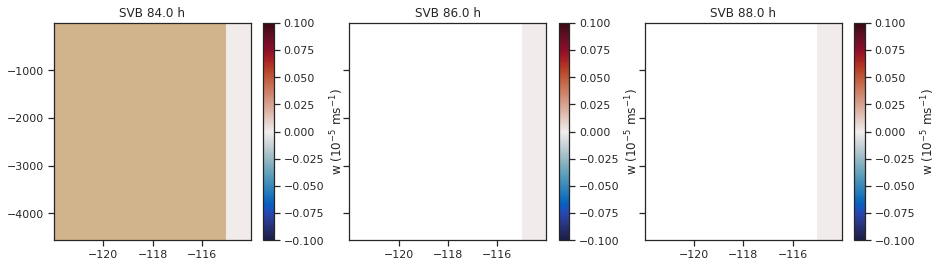

KeyboardInterrupt: 

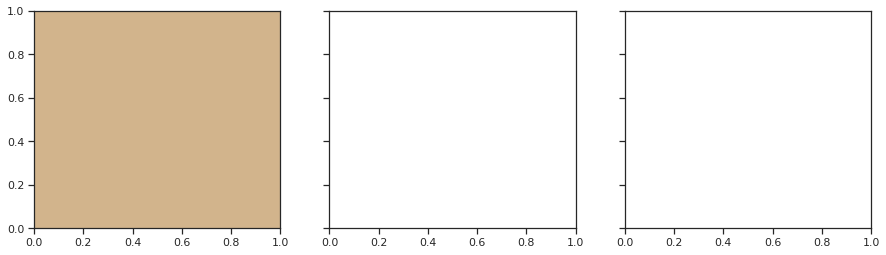

In [21]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(0,288,18):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,Z,ds2['WVEL'][ii,:,300,:]*1E5,
                      #vmin=-0.30,vmax=0.30,
                       cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax,label='w ($10^{-5}$ ms$^{-1}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,Z,ds2['WVEL'][ii+6,:,300,:]*1E5,
                  #     vmin=-0.30,vmax=0.30,
                        cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax1,label='w ($10^{-5}$ ms$^{-1}$)')
    ax1.set_title('SVB %1.1f h' %((ii+6)*1200/3600))

    pc = ax2.pcolormesh(lon,Z,(ds2['WVEL'][ii+12,:,300,:]*1E5),
                        #vmin=-0.30,vmax=0.30,
                        cmap=cmo.cm.balance)
    cb = plt.colorbar(pc,ax=ax2,label='w ($10^{-5}$ ms$^{-1}$)')
    ax2.set_title('SVB %1.1f h' %((ii+12)*1200/3600))

    plt.show()

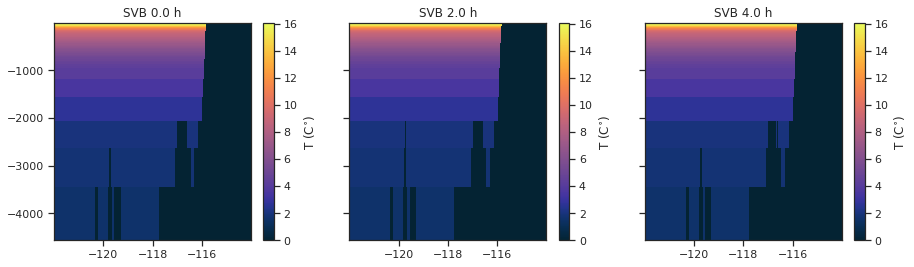

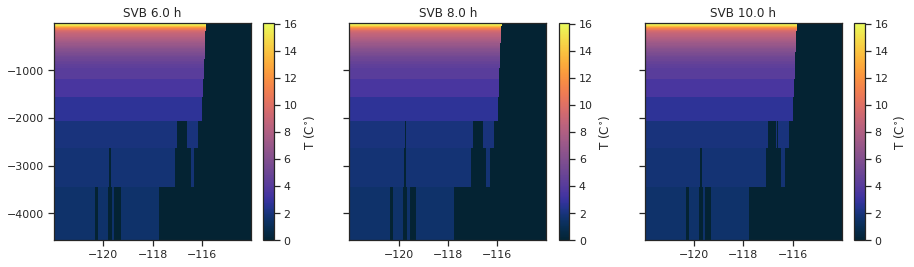

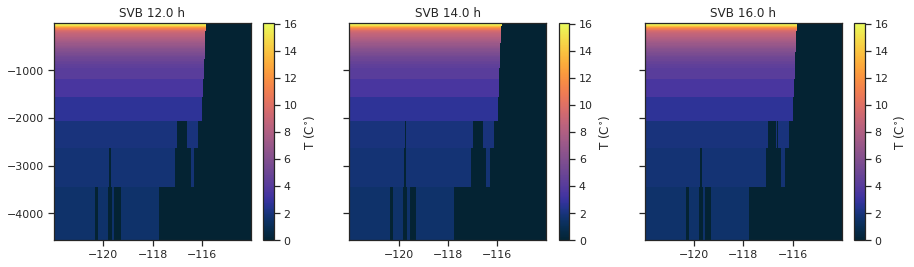

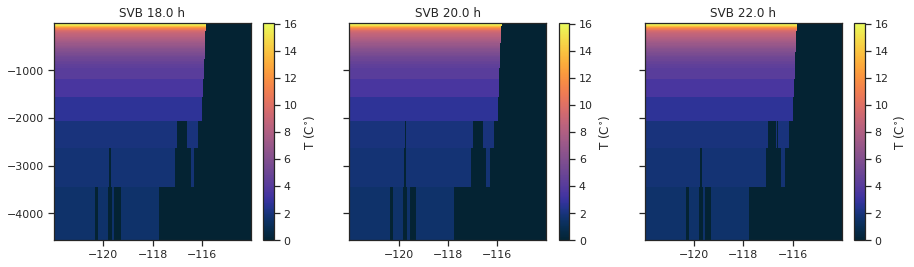

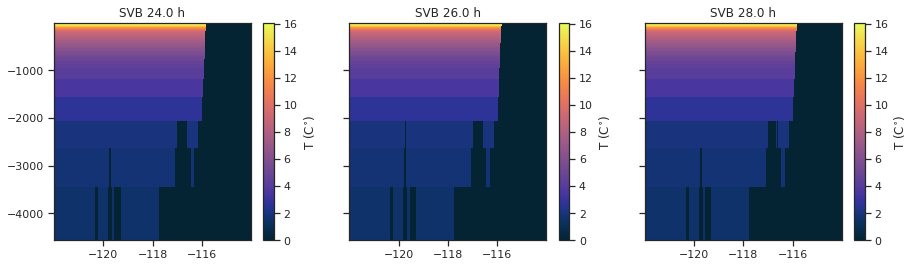

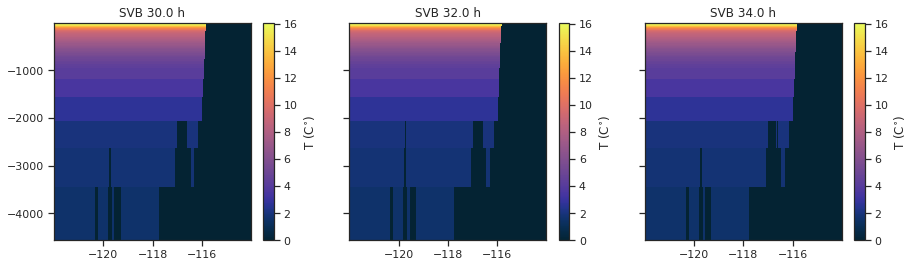

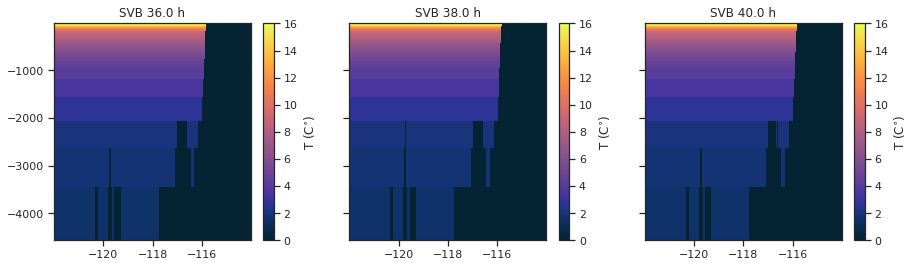

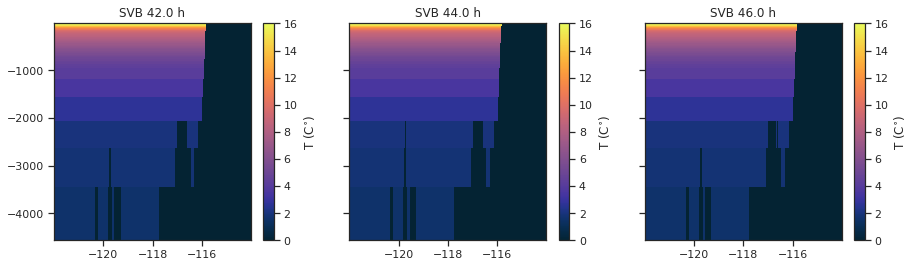

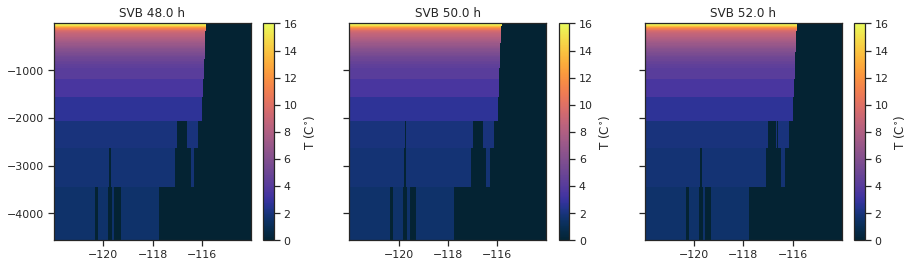

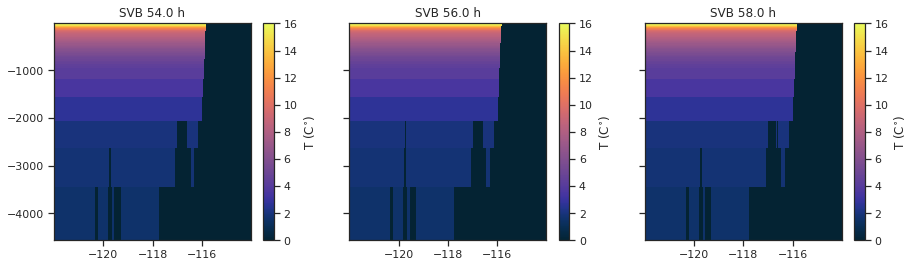

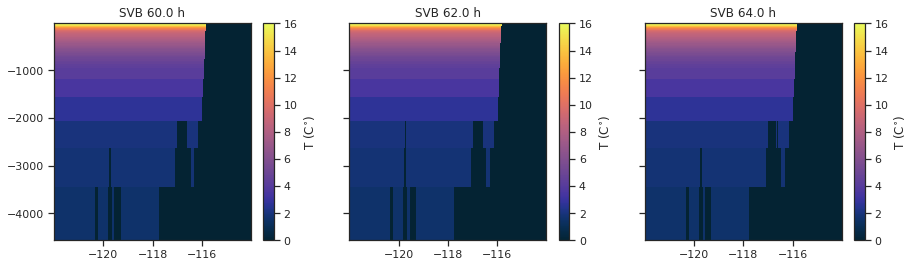

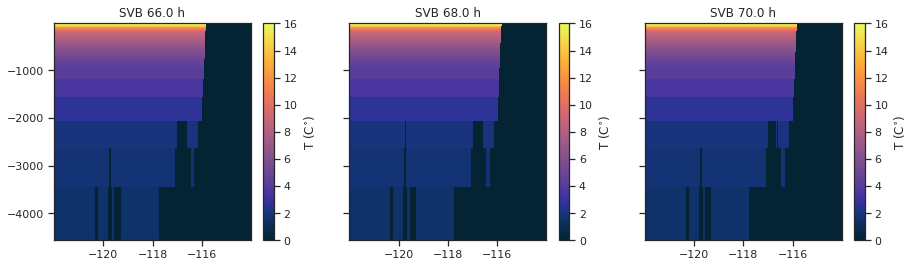

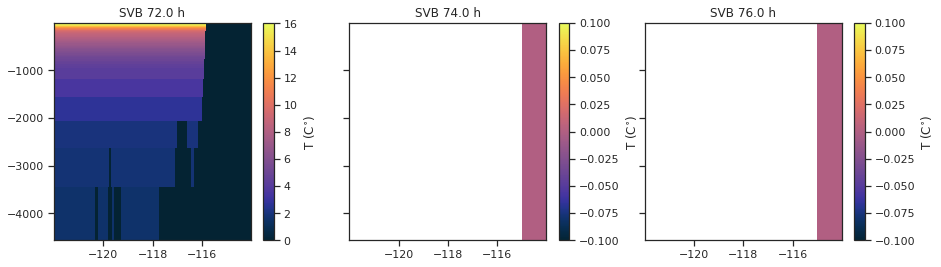

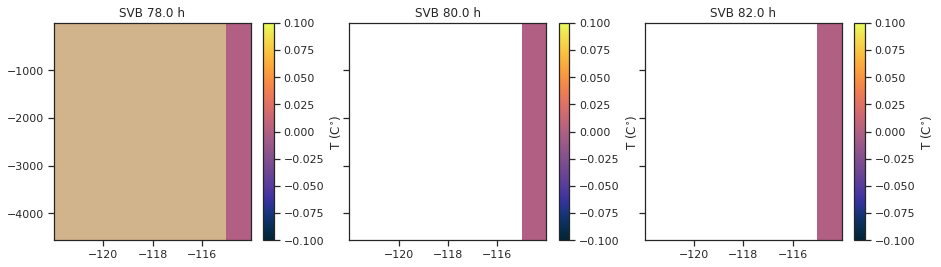

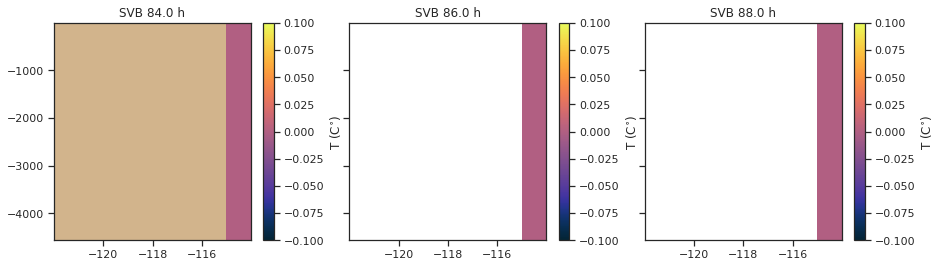

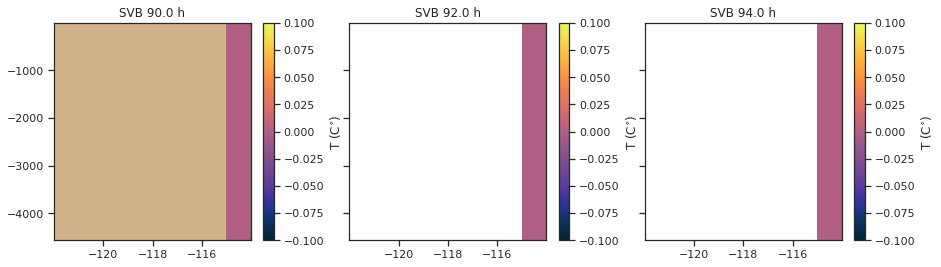

In [22]:
sns.set_style('ticks')
sns.set_context('notebook')

for ii in range(0,288,18):
    fig, (ax,ax1,ax2) = plt.subplots(1,3,figsize=(15,4), sharey=True)
    ax.set_facecolor('tan')

    pc = ax.pcolormesh(lon,Z,ds2['THETA'][ii,:,300,:],
                  #vmin=10,vmax=16,
                       cmap=cmo.cm.thermal)
    cb = plt.colorbar(pc,ax=ax,label='T (C$^{\circ}$)')
    ax.set_title('SVB %1.1f h' %(ii*1200/3600))

    pc = ax1.pcolormesh(lon,Z,ds2['THETA'][ii+6,:,300,:],
                  #vmin=10,vmax=16,
                        cmap=cmo.cm.thermal)
    cb = plt.colorbar(pc,ax=ax1,label='T (C$^{\circ}$)')
    ax1.set_title('SVB %1.1f h' %((ii+6)*1200/3600))

    pc = ax2.pcolormesh(lon,Z,(ds2['THETA'][ii+12,:,300,:]),
                  #vmin=10,vmax=16,
                        cmap=cmo.cm.thermal)
    cb = plt.colorbar(pc,ax=ax2,label='T (C$^{\circ}$)')
    ax2.set_title('SVB %1.1f h' %((ii+12)*1200/3600))

    plt.show()

In [26]:
7200*60/1200

360.0

In [34]:
(614*1200)/60

12280.0

In [61]:
12287*60/3600

204.78333333333333

In [62]:
208.33*3600/60

12499.8